# Эксперимент 1

In [1]:
%%bash
./task-1/stage-1/info.sh

RAM_SIZE = 11877 mB
SWAP_SIZE = 7812 mB
PAGE_SIZE = 4096 B
RAM_AVAILABLE_SIZE = 6771 mB
SWAP_AVAILABLE_SIZE = 7812 mB


## 1.1 Эксперимент c 1-м скриптом

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def get_plot(ram_info_path, swap_info_path, top_log_path, proc_name_suffix):
    ram_file = open(ram_info_path, "r")
    ram_data = np.array((list(map(lambda x: float(x.replace(",", ".")), ram_file.read().split("\n")[:-1]))))
    ram_file.close()
    #print(ram_data)

    swap_file = open(swap_info_path, "r")
    swap_data = np.array((list(map(lambda x: float(x.replace(",", ".")), swap_file.read().split("\n")[:-1]))))
    osx = np.arange(1, 2 * len(ram_data), 2)
    swap_file.close()
    #print(swap_data)

    plt.figure(figsize=(15, 7))    
    plt.plot(osx, ram_data, 'red', label='free_ram')
    plt.plot(osx, swap_data, 'blue', label='free_swap')
    plt.xlabel("time in seconds")
    plt.ylabel("free memory in mBs")
    plt.legend()
    

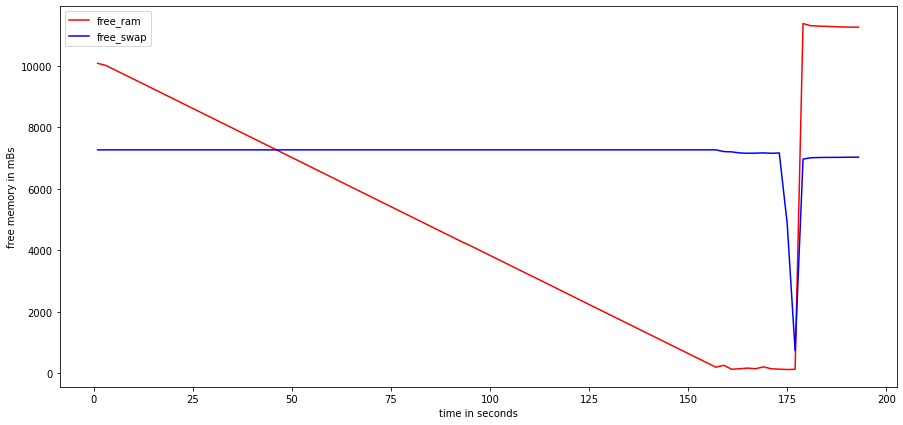

In [3]:
get_plot("task-1/stage-1/attempt-3/ram_info.txt", 
         "task-1/stage-1/attempt-3/swap_info.txt", 
         "task-1/stage-1/attempt-3/top-log.txt", None)

Почти сразу же (через 3 сек после старта), процесс становится топ1 по требуемой ему оперативной памяти и занимает эту позицию до завершения процесса.
```
MiB Mem :  11877,2 total,   9895,7 free,    731,4 used,   1250,0 buff/cache
MiB Swap:   7813,0 total,   7270,9 free,    542,1 used.  10710,8 avail Mem 

  PID USER      PR  NI    VIRT    RES    SHR S  %CPU  %MEM     TIME+ COMMAND
10830 roma      20   0  208264 202124   3224 R 100,0   1,7   0:03.35 mem.sh
 1393 roma      20   0 2090784 148536  68084 S   0,0   1,2   1:16.69 plasmashell
10273 roma      20   0 1029016 103548  74460 S   0,0   0,9   0:01.77 kate
 9606 roma      20   0  599096  98912  65492 S   0,0   0,8   0:02.51 okular
  903 root      20   0  348344  72684  52924 S   0,0   0,6   2:39.93 Xorg
  ```

Память под процесс выделяется линейно, swap не требуется пока есть место в оперативной памяти. Как только место кончается, происходит копирование страниц из RAM на swap-раздел жёсткого диска. Потом, когда процесс удалён системой, эти страницы удаляются из swap'a и оперативная память освобождается, что и видно на графике.

### Записи о скрипте в системном журнале:
<img src="task-1/stage-1/attempt-3/proc_message.png" alt="proc_message" style="zoom:100%;" />

In [4]:
%%bash
cat task-1/stage-1/attempt-3/proc_message.txt

[ 1004.316428] [   2012]  1000  2012  4681273  2908580 37564416  1770420             0 mem.sh
[ 1004.316450] oom-kill:constraint=CONSTRAINT_NONE,nodemask=(null),cpuset=/,mems_allowed=0,global_oom,task_memcg=/user.slice/user-1000.slice/session-4.scope,task=mem.sh,pid=2012,uid=1000
[ 1004.316462] Out of memory: Killed process 2012 (mem.sh) total-vm:18725092kB, anon-rss:11634320kB, file-rss:0kB, shmem-rss:0kB
[ 1004.633121] oom_reaper: reaped process 2012 (mem.sh), now anon-rss:0kB, file-rss:0kB, shmem-rss:0kB
[ 1978.924750] [   4987]  1000  4987  4671208  2916448 37482496  1752477             0 mem.sh
[ 1978.924802] oom-kill:constraint=CONSTRAINT_NONE,nodemask=(null),cpuset=/,mems_allowed=0,global_oom,task_memcg=/user.slice/user-1000.slice/session-4.scope,task=mem.sh,pid=4987,uid=1000
[ 1978.924828] Out of memory: Killed process 4987 (mem.sh) total-vm:18684832kB, anon-rss:11665792kB, file-rss:0kB, shmem-rss:0kB
[ 1979.259589] oom_reaper: reaped process 4987 (mem.sh), now anon-rss:0kB, fi

In [5]:
11634320 // 1024 # - суммароное колво выделенной процессу памяти в МБ

11361

In [6]:
%%bash
cat task-1/stage-1/attempt-3/report.log | tail -1 # - количество элементов в массиве при остановке процесса

238400000


In [7]:
11634320 * 1024 / 238400000 # - примерно количество байт на один элемент массива

49.97291812080537

## 1.2 Эксперимент с 2-мя скриптами


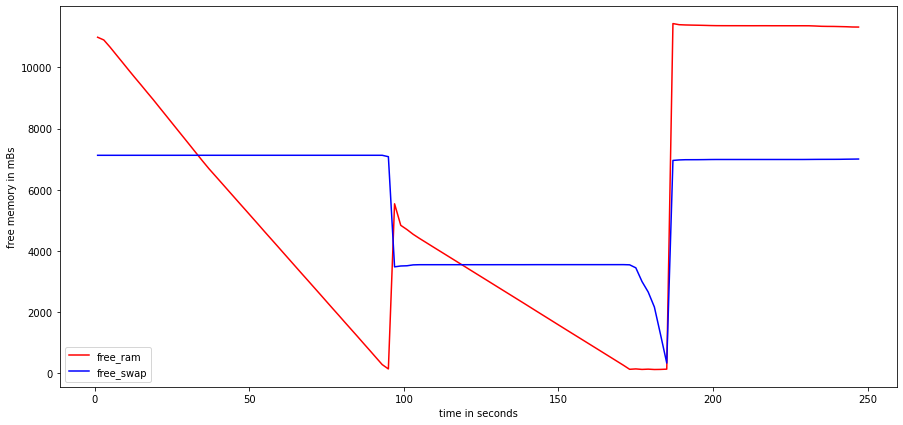

In [8]:
get_plot("task-1/stage-2/attempt-2/ram_info.txt", 
         "task-1/stage-2/attempt-2/swap_info.txt", 
         "task-1/stage-2/attempt-2/top-log.txt", "1")

Почти сразу же (через 3 сек после старта), процессы становится топ1-2 по требуемой им оперативной памяти и занимают свои позиции до завершения соответствующего процесса.

```
MiB Mem :  11877,2 total,  10666,6 free,    741,3 used,    469,3 buff/cache
MiB Swap:   7813,0 total,   7125,0 free,    688,0 used.  10775,3 avail Mem 

  PID USER      PR  NI    VIRT    RES    SHR S  %CPU  %MEM     TIME+ COMMAND
11504 roma      20   0  171568 165412   3200 R 100,0   1,4   0:03.00 mem1.sh
11505 roma      20   0  171172 165100   3144 R  93,8   1,4   0:03.00 mem2.sh
 9606 roma      20   0  606948  80348  23772 S   0,0   0,7   0:03.88 okular
 1393 roma      20   0 2090780  76864  33524 S   0,0   0,6   1:23.34 plasmashell
  903 root      20   0  350276  67396  48668 S   0,0   0,6   2:57.85 Xorg
```

Момент, когда произошло копирование в swap памяти выделенной первому скрипту, а потом и его аварийное завершение :
```
MiB Mem :  11877,2 total,    136,6 free,  11380,7 used,    360,0 buff/cache
MiB Swap:   7813,0 total,   7079,7 free,    733,2 used.    183,9 avail Mem 

  PID USER      PR  NI    VIRT    RES    SHR S  %CPU  %MEM     TIME+ COMMAND
11504 roma      20   0 5615644   5,3g   3200 R  93,8  46,1   1:40.78 mem1.sh
11505 roma      20   0 5598088   5,3g   3144 R  93,8  46,0   1:40.78 mem2.sh
 9606 roma      20   0  606948  80348  23772 S   0,0   0,7   0:03.89 okular
 1393 roma      20   0 2090800  77172  33512 S   0,0   0,6   1:23.65 plasmashell
  903 root      20   0  350276  67384  48656 S   0,0   0,6   2:58.12 Xorg
    
----------------------------------------------------------------------------
MiB Mem :  11877,2 total,   5539,4 free,   6175,6 used,    162,3 buff/cache
MiB Swap:   7813,0 total,   3476,0 free,   4337,0 used.   5456,9 avail Mem 

  PID USER      PR  NI    VIRT    RES    SHR S  %CPU  %MEM     TIME+ COMMAND
11505 roma      20   0 9547924   5,7g   1456 R   7,5  49,3   3:09.30 mem2.sh
  903 root      20   0  350276  25196  23508 S   0,0   0,2   2:58.58 Xorg
 1393 roma      20   0 2090800  13848   2400 D   0,0   0,1   1:24.22 plasmashell
 9606 roma      20   0  606948   9540      0 S   0,0   0,1   0:04.03 okular
10789 roma      20   0  407916   6944   5088 S   0,0   0,1   0:03.07 konsole
```

In [9]:
%%bash
cat task-1/stage-2/attempt-2/report1.log | tail -1 # - размер массива-1 на момент аварийного завершения первого скрипта
cat task-1/stage-2/attempt-2/report2.log | tail -1 # - размер массива-1 на момент аварийного завершения первого скрипта


119900000
238200000


### Записи о скрипте в системном журнале:
<img src="task-1/stage-2/attempt-2/proc_messages.png" alt="proc_message" style="zoom:100%;"/>

In [10]:
%%bash
cat task-1/stage-2/attempt-2/proc_message.txt

[ 1004.316428] [   2012]  1000  2012  4681273  2908580 37564416  1770420             0 mem.sh
[ 1004.316450] oom-kill:constraint=CONSTRAINT_NONE,nodemask=(null),cpuset=/,mems_allowed=0,global_oom,task_memcg=/user.slice/user-1000.slice/session-4.scope,task=mem.sh,pid=2012,uid=1000
[ 1004.316462] Out of memory: Killed process 2012 (mem.sh) total-vm:18725092kB, anon-rss:11634320kB, file-rss:0kB, shmem-rss:0kB
[ 1004.633121] oom_reaper: reaped process 2012 (mem.sh), now anon-rss:0kB, file-rss:0kB, shmem-rss:0kB
[ 1978.924750] [   4987]  1000  4987  4671208  2916448 37482496  1752477             0 mem.sh
[ 1978.924802] oom-kill:constraint=CONSTRAINT_NONE,nodemask=(null),cpuset=/,mems_allowed=0,global_oom,task_memcg=/user.slice/user-1000.slice/session-4.scope,task=mem.sh,pid=4987,uid=1000
[ 1978.924828] Out of memory: Killed process 4987 (mem.sh) total-vm:18684832kB, anon-rss:11665792kB, file-rss:0kB, shmem-rss:0kB
[ 1979.259589] oom_reaper: reaped process 4987 (mem.sh), now anon-rss:0kB, fi

### Вывод

Параметр swap изменялся только после того, как получили нехватку RAM, в swap копировались страницы виртуальной памяти и на графиках сразу же уменьшалось количество доступной памяти раздела подкачки. Размер свободной оперативной памяти уменьшался линейно, после копирования страниц памяти в swap, а потом резко увеличивался так как освобождалась память процесса.

# Эксперимент 2

Убедимся, что при K = 10 запущенных скриптах с параметром N = 23840000, все успешно завершатся.
<img src="task-2/dmesg-1.png" alt="proc_message" style="zoom:100%;"/>
Действительно, ни одной записи в журнале не найдено.

Посмотрим на значние К = 30. Параметр N оставим всё так же равным 23840000. Видим, что некотрые процессы завершились аварийно.
<img src="task-2/dmesg-2.png" alt="proc_message" style="zoom:100%;"/>

Это произошло, потому что N * K >= X, где X - предельное значение, полученное в первом эксперименте.

Тогда понятно, что для K = 30, очень легко подобрать N = 23840000 / 3 ~ 7946666, чтобы выполнялось N * K <= X.

Действительно, при N = 7946666, все процессы завершились успешно.

<img src="task-2/dmesg-3.png" alt="proc_message" style="zoom:100%;"/>